### Fuzzy c-means clustering
Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering where every point is assigned a crisp, exact label.

Fuzzy c-means clustering is accomplished via skfuzzy.cmeans, and the output from this function can be repurposed to classify new data according to the calculated clusters (also known as prediction) via skfuzzy.cmeans_predict


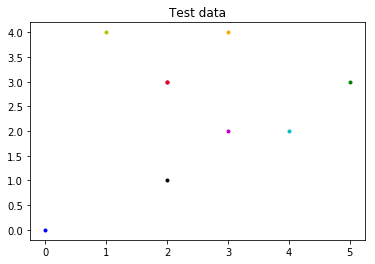

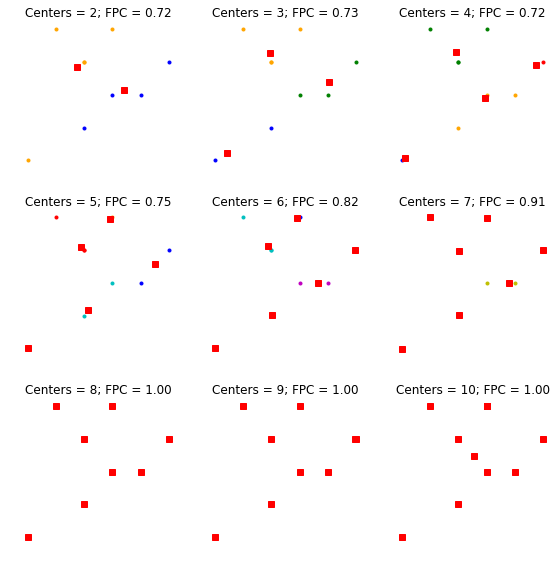

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
##############################
#### Точки сюда ставь ########
##############################
points = [[2,3], [3,4], [5,3], [2,3], [4,2], [3,2], [1, 4], [2,1]]
##############################
## Больше ничего не трогай ###
##############################
for i in range(len(points)):
    xpts = np.hstack((xpts, points[i][0]))
    ypts = np.hstack((ypts, points[i][1]))
    labels = np.hstack((labels, np.ones(1) * i))

# График начальных точек
fig0, ax0 = plt.subplots()
for label in range(len(points)):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data')
    
# Кластеризируем по циклу
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Схраняем значение fpc
    fpcs.append(fpc)

    # Отрисовать каждую точку в нужный кластер
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Пометить центры кластеров
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

### The fuzzy partition coefficient (FPC)
The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best.

Text(0,0.5,'Fuzzy partition coefficient')

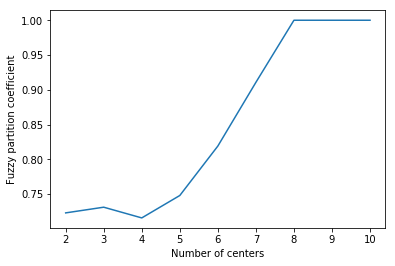

In [3]:
ig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

### Увеличение размеров кластера

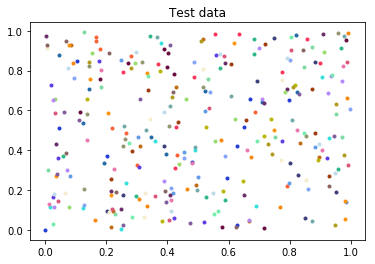

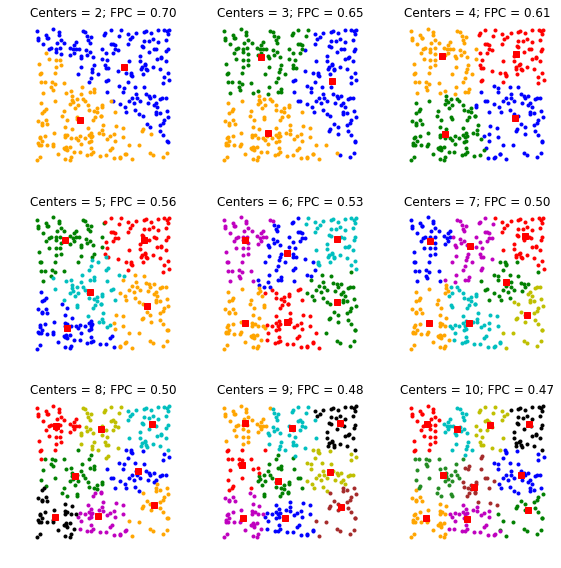

In [4]:
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i in range(30):
    xpts = np.hstack((xpts, np.random.random_sample(10)))
    ypts = np.hstack((ypts, np.random.random_sample(10)))
    labels = np.hstack((labels, np.ones(10) * i))
# График начальных точек
fig0, ax0 = plt.subplots()
for label in range(len(labels)):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=np.random.rand(3,))
ax0.set_title('Test data')

# Кластеризируем по циклу
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Схраняем значение fpc
    fpcs.append(fpc)

    # Отрисовать каждую точку в нужный кластер
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Пометить центры кластеров
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()


Text(0,0.5,'Fuzzy partition coefficient')

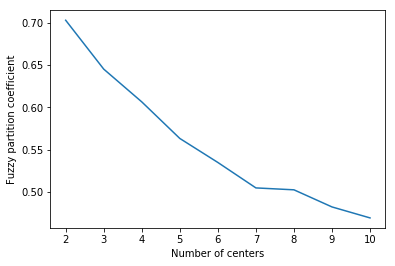

In [5]:
ig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")